# Statistical distributions

In [1]:
#install.packages("tidyverse")
#install.packages("lubridate")
#install.packages("openxlsx")
#install.packages("Hmisc")
#install.packages("fitdistrplus")

In [3]:
library(tidyverse)
library(tidyr)
library(dplyr)
library(ggplot2)
library(readxl)
library(openxlsx)
library(lattice)
library(fitdistrplus)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Le chargement a nécessité le package : MASS


Attachement du package : 'MASS'


L'objet suivant est masqué depuis 'package:dplyr':

    select


Le chargement a nécessité le package : survival



In [4]:
version

               _                                
platform       x86_64-w64-mingw32               
arch           x86_64                           
os             mingw32                          
crt            ucrt                             
system         x86_64, mingw32                  
status                                          
major          4                                
minor          3.3                              
year           2024                             
month          02                               
day            29                               
svn rev        86002                            
language       R                                
version.string R version 4.3.3 (2024-02-29 ucrt)
nickname       Angel Food Cake                  

In [5]:
# Read a CSV file into a data frame
df <- read.csv("Data/All_dat_df.csv")
head(df)

,site,datetime,year,month,day,hour,dayofwk,daytype,season,O3,⋯,NOX,TEMP,PREC,RAD,SO2,PM2.5,EC,CPC,avg_wind_speed,avg_wind_direction
,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,DAV,2024-01-01 00:00:00,2024,1,1,0,Mon,Weekday,Winter,57.7,⋯,1.9,-2.2,0,-0.6,NA,NA,NA,NA,1.0980000,36.25794
2,DAV,2024-01-01 01:00:00,2024,1,1,1,Mon,Weekday,Winter,55.2,⋯,2.1,-2.8,0,-0.7,NA,NA,NA,NA,0.9216667,40.71351
3,DAV,2024-01-01 02:00:00,2024,1,1,2,Mon,Weekday,Winter,49.9,⋯,3.7,-3.3,0,-0.7,NA,NA,NA,NA,0.6716667,150.12313
4,DAV,2024-01-01 03:00:00,2024,1,1,3,Mon,Weekday,Winter,52.1,⋯,4.6,-4.2,0,-1.1,NA,NA,NA,NA,0.5250000,40.87731
5,DAV,2024-01-01 04:00:00,2024,1,1,4,Mon,Weekday,Winter,65.8,⋯,0.7,-5.2,0,-1.3,NA,NA,NA,NA,1.4700000,186.90946
6,DAV,2024-01-01 05:00:00,2024,1,1,5,Mon,Weekday,Winter,67.1,⋯,0.7,-5.6,0,-0.8,NA,NA,NA,NA,1.9350000,184.88936


In [6]:
# Access column names
colnames(df)
variables <- c('O3','NO2','PM10','NOX','TEMP','PREC','RAD','SO2','PM2.5','EC','CPC','avg_wind_speed','avg_wind_direction')

[1] "site"               "datetime"           "year"              
 [4] "month"              "day"                "hour"              
 [7] "dayofwk"            "daytype"            "season"            
[10] "O3"                 "NO2"                "PM10"              
[13] "NOX"                "TEMP"               "PREC"              
[16] "RAD"                "SO2"                "PM2.5"             
[19] "EC"                 "CPC"                "avg_wind_speed"    
[22] "avg_wind_direction"

In [24]:
ReplaceNonpositive <- function(x) {
  x <- na.omit(x)
  min.positive.value <- min(x[x>0])
  replace(x, x < min.positive.value, min.positive.value)
}

## DAVOS 

#### hourly distributions

In [7]:
lf <- pivot_longer(df, all_of(variables), names_to = "variable", values_to = "value")
daily.max <- lf %>%
  group_by(site, year, month, day, season, variable) %>%
  summarize(value = max(value, na.rm=TRUE), .groups = "drop") %>%
  pivot_wider(names_from = variable, values_from = value)

Warning message:
"There were 1487 warnings in `summarize()`.
The first warning was:
ℹ In argument: `value = max(value, na.rm = TRUE)`.
ℹ In group 170: `site = "BAS"`, `year = 2024`, `month = 1`, `day = 14`, `season = "Winter"`, `variable = "CPC"`.
Caused by warning in `max()`:
! aucun argument pour max ; -Inf est renvoyé
ℹ Run `dplyr::last_dplyr_warnings()` to see the 1486 remaining warnings."


In [8]:
head(lf)

site,datetime,year,month,day,hour,dayofwk,daytype,season,variable,value
<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>
DAV,2024-01-01 00:00:00,2024,1,1,0,Mon,Weekday,Winter,O3,57.7
DAV,2024-01-01 00:00:00,2024,1,1,0,Mon,Weekday,Winter,NO2,1.9
DAV,2024-01-01 00:00:00,2024,1,1,0,Mon,Weekday,Winter,PM10,1.2
DAV,2024-01-01 00:00:00,2024,1,1,0,Mon,Weekday,Winter,NOX,1.9
DAV,2024-01-01 00:00:00,2024,1,1,0,Mon,Weekday,Winter,TEMP,-2.2
DAV,2024-01-01 00:00:00,2024,1,1,0,Mon,Weekday,Winter,PREC,0.0


[1] "O3"
Fitting of the distribution ' lnorm ' by maximum likelihood 
Parameters:
         estimate  Std. Error
meanlog 4.1169930 0.010849449
sdlog   0.2957346 0.007671324
Goodness-of-fit statistics
                             1-mle-lnorm
Kolmogorov-Smirnov statistic  0.06202067
Cramer-von Mises statistic    0.67872649
Anderson-Darling statistic    4.84529609

Goodness-of-fit criteria
                               1-mle-lnorm
Akaike's Information Criterion    6420.011
Bayesian Information Criterion    6429.232
p-value = 5.129429e-07 

[1] "NO2"
Fitting of the distribution ' lnorm ' by maximum likelihood 
Parameters:
         estimate Std. Error
meanlog 0.2636739 0.01535083
sdlog   0.4175877 0.01085439
Goodness-of-fit statistics
                             1-mle-lnorm
Kolmogorov-Smirnov statistic  0.07287278
Cramer-von Mises statistic    0.55953973
Anderson-Darling statistic    3.24808631

Goodness-of-fit criteria
                               1-mle-lnorm
Akaike's Information Criter

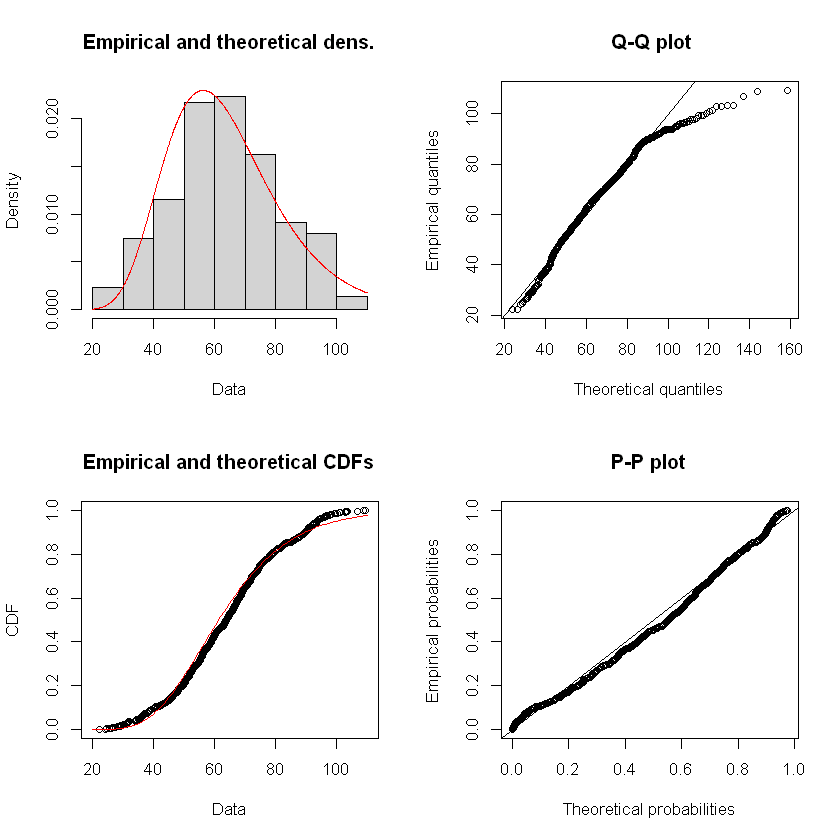

[1] "PM10"
Fitting of the distribution ' lnorm ' by maximum likelihood 
Parameters:
         estimate Std. Error
meanlog 1.6401445 0.02828777
sdlog   0.7715875 0.02000232
Goodness-of-fit statistics
                             1-mle-lnorm
Kolmogorov-Smirnov statistic   0.0519010
Cramer-von Mises statistic     0.6558602
Anderson-Darling statistic     4.0857141

Goodness-of-fit criteria
                               1-mle-lnorm
Akaike's Information Criterion    4170.069
Bayesian Information Criterion    4179.293
p-value = 3.346267e-16 



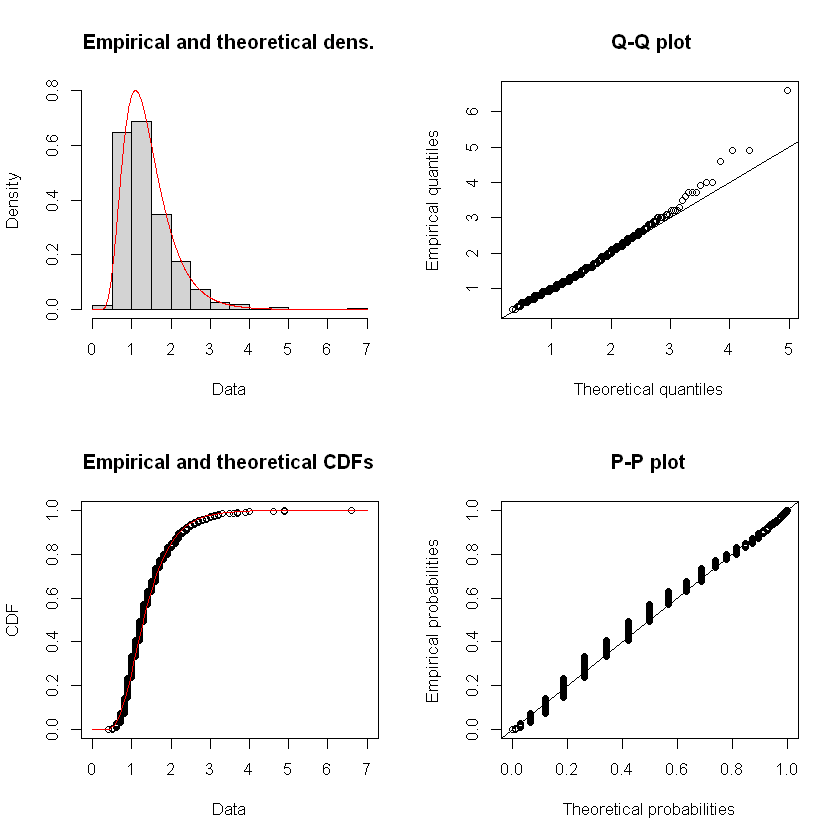

[1] "NOX"
Fitting of the distribution ' lnorm ' by maximum likelihood 
Parameters:
         estimate Std. Error
meanlog 0.3690148 0.01544954
sdlog   0.4202731 0.01092420
Goodness-of-fit statistics
                             1-mle-lnorm
Kolmogorov-Smirnov statistic  0.07561189
Cramer-von Mises statistic    0.72340654
Anderson-Darling statistic    4.29441614

Goodness-of-fit criteria
                               1-mle-lnorm
Akaike's Information Criterion    1367.232
Bayesian Information Criterion    1376.445
p-value = 0.0002967304 



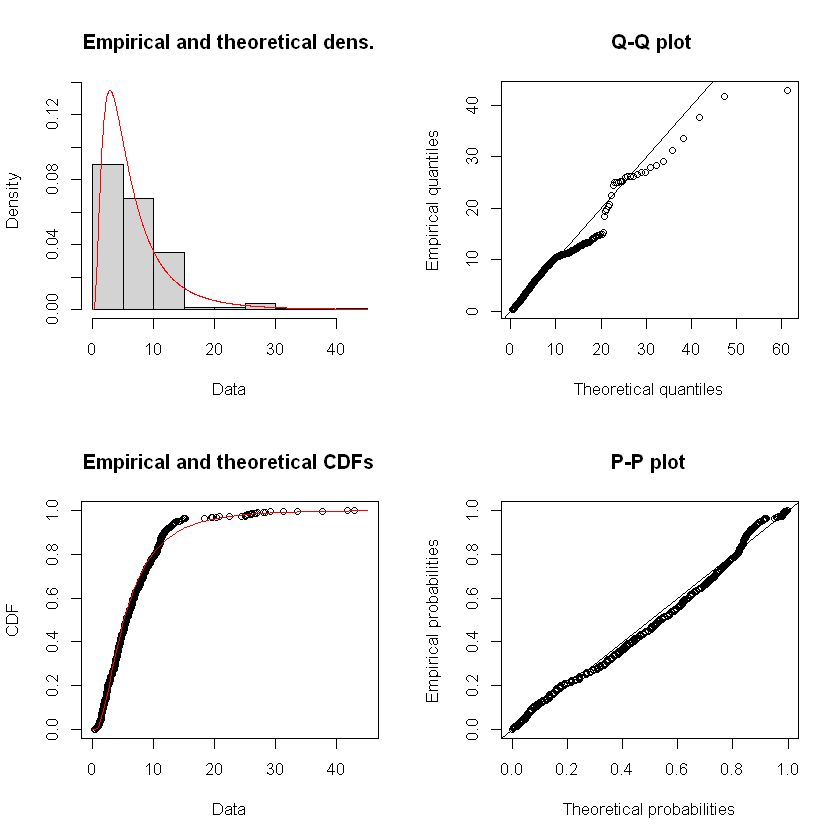

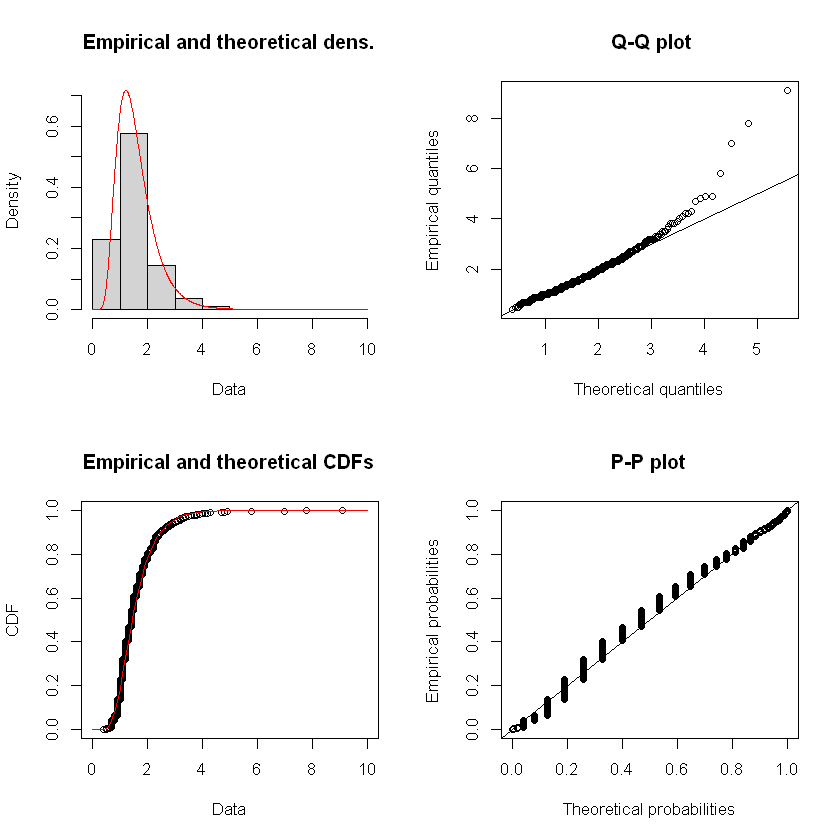

In [106]:
variables_DAV <- c('O3','NO2','PM10', 'NOX')
pval_table_DAV_h <- data.frame(Variable = character(), ChiSq_pvalue = numeric(), CvM = numeric(), AD = numeric(), stringsAsFactors = FALSE)

for (var in variables_DAV) {
    concvec <- lf %>% 
      filter(site=="DAV" & month==7 & variable==var) %>%
      {c(na.omit(.[["value"]]))}
    
    fit <- fitdist(ReplaceNonpositive(concvec), "lnorm")
    
    print(var)
    print(fit)
    gof <-gofstat(fit)
    print(gof)
    cat("p-value =", gofstat(fit)[["chisqpvalue"]], "\n\n")
    pval.h <- gofstat(fit)[["chisqpvalue"]]
    # Append to table
    pval_table_DAV_h <- rbind(pval_table_DAV_h, data.frame(Variable = var, ChiSq_pvalue = pval.h, CvM =gof[["cvm"]], AD = gof[["ad"]] ))
  
    
    plot(fit)
}



In [107]:
rownames(pval_table_DAV_h) <- NULL
pval_table_DAV_h

Variable,ChiSq_pvalue,CvM,AD
<chr>,<dbl>,<dbl>,<dbl>
O3,5.129429e-07,0.6787265,4.845296
NO2,1.699971e-03,0.5595397,3.248086
PM10,3.346267e-16,0.6558602,4.085714
NOX,2.967304e-04,0.7234065,4.294416


#### Daily distributions

In [33]:
variables_DAV <- c('O3', 'NO2', 'PM10', 'NOX')

# Ensure datetime is in proper Date format
lf <- lf %>%
  mutate(date = as.Date(datetime))

# Precompute daily averages only for complete days
daily_avg_data <- lf %>%
  filter(site == "DAV", month == 7, variable %in% variables_DAV) %>%
  group_by(variable, date) %>%
  filter(n() == 24) %>%  # Keep only complete days
  summarise(daily_avg = mean(value, na.rm = TRUE), .groups = "drop")
daily_avg_data

variable,date,daily_avg
<chr>,<date>,<dbl>
NO2,2024-07-01,1.083333
NO2,2024-07-02,1.212500
NO2,2024-07-03,1.133333
NO2,2024-07-04,1.225000
NO2,2024-07-05,1.458333
NO2,2024-07-06,1.820833
NO2,2024-07-07,1.395833
NO2,2024-07-08,1.437500
NO2,2024-07-09,1.033333


[1] "O3"
Fitting of the distribution ' lnorm ' by maximum likelihood 
Parameters:
         estimate Std. Error
meanlog 4.1468464 0.02682622
sdlog   0.1493621 0.01896517
Goodness-of-fit statistics
                             1-mle-lnorm
Kolmogorov-Smirnov statistic  0.10928986
Cramer-von Mises statistic    0.07259433
Anderson-Darling statistic    0.44586954

Goodness-of-fit criteria
                               1-mle-lnorm
Akaike's Information Criterion     231.193
Bayesian Information Criterion     234.061
p-value = 0.1660449 

[1] "NO2"
Fitting of the distribution ' lnorm ' by maximum likelihood 
Parameters:
        estimate Std. Error
meanlog 0.337489 0.03322195
sdlog   0.184972 0.02348838
Goodness-of-fit statistics
                             1-mle-lnorm
Kolmogorov-Smirnov statistic  0.10070919
Cramer-von Mises statistic    0.05010732
Anderson-Darling statistic    0.34489542

Goodness-of-fit criteria
                               1-mle-lnorm
Akaike's Information Criterion    8.

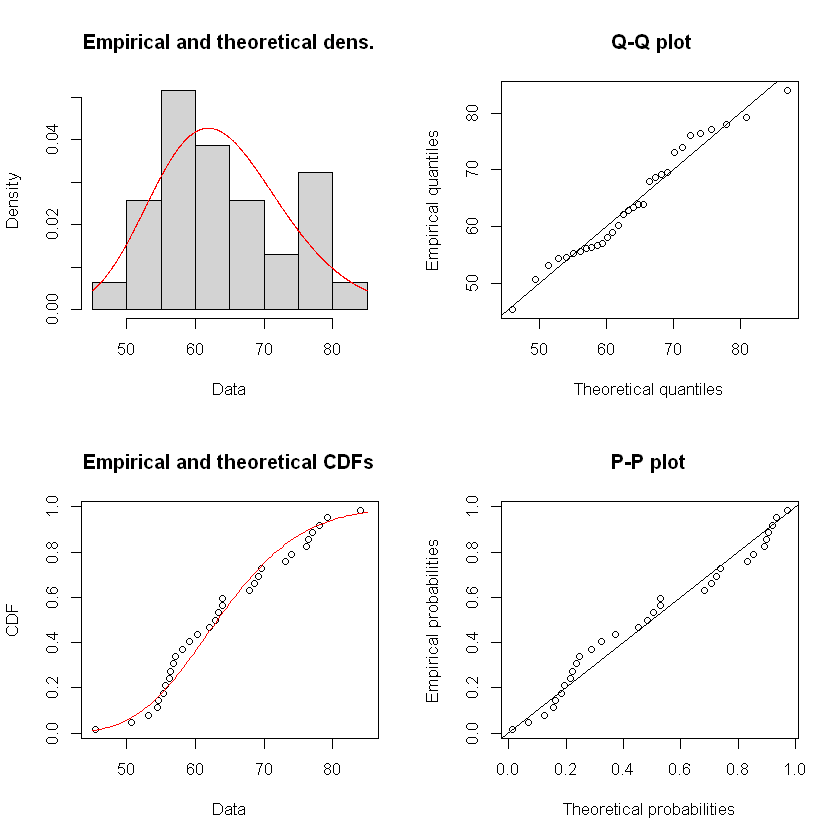

[1] "PM10"
Fitting of the distribution ' lnorm ' by maximum likelihood 
Parameters:
         estimate Std. Error
meanlog 1.7081042 0.11816073
sdlog   0.6578911 0.08355138
Goodness-of-fit statistics
                             1-mle-lnorm
Kolmogorov-Smirnov statistic  0.10718844
Cramer-von Mises statistic    0.04119797
Anderson-Darling statistic    0.27161845

Goodness-of-fit criteria
                               1-mle-lnorm
Akaike's Information Criterion    171.9163
Bayesian Information Criterion    174.7842
p-value = 0.7082673 



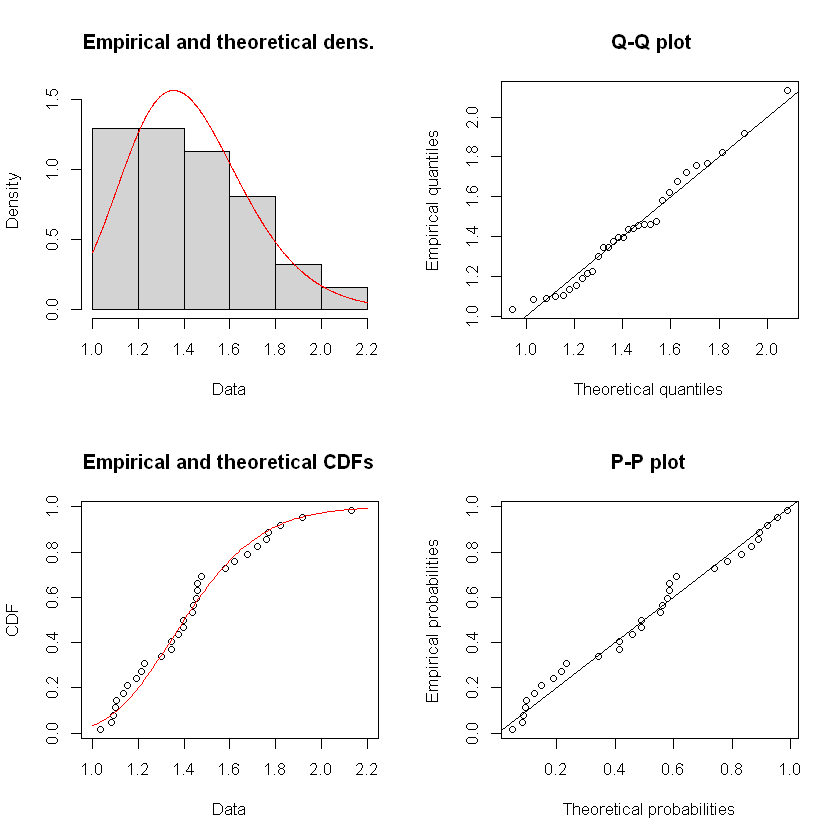

[1] "NOX"
Fitting of the distribution ' lnorm ' by maximum likelihood 
Parameters:
         estimate Std. Error
meanlog 0.4477526 0.03302844
sdlog   0.1838946 0.02335153
Goodness-of-fit statistics
                             1-mle-lnorm
Kolmogorov-Smirnov statistic  0.10570591
Cramer-von Mises statistic    0.04898207
Anderson-Darling statistic    0.35641259

Goodness-of-fit criteria
                               1-mle-lnorm
Akaike's Information Criterion    14.74451
Bayesian Information Criterion    17.61248
p-value = 0.1338758 



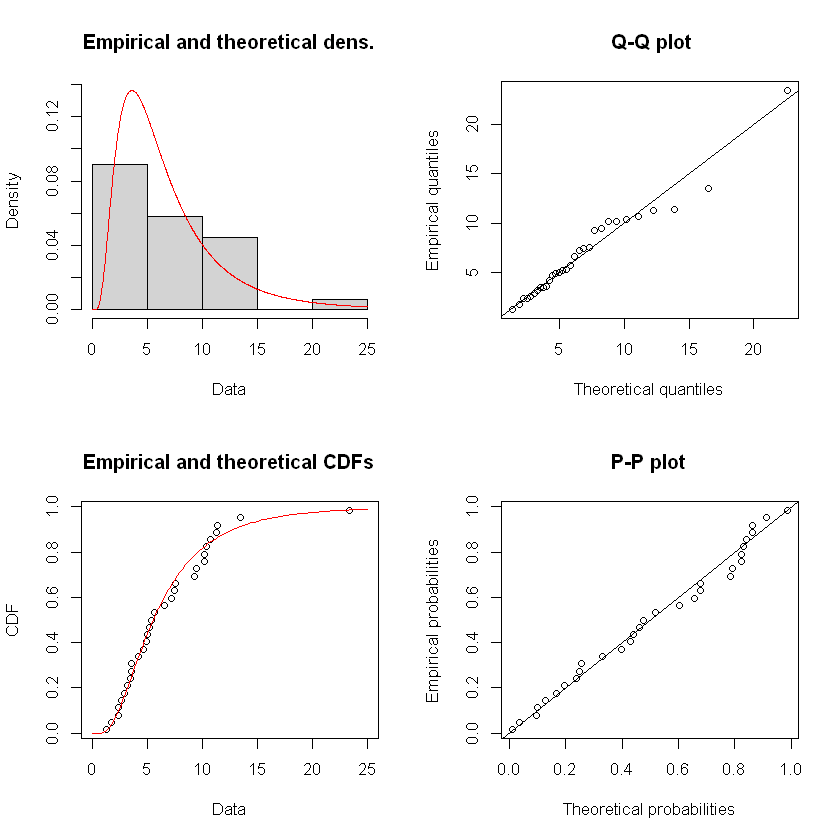

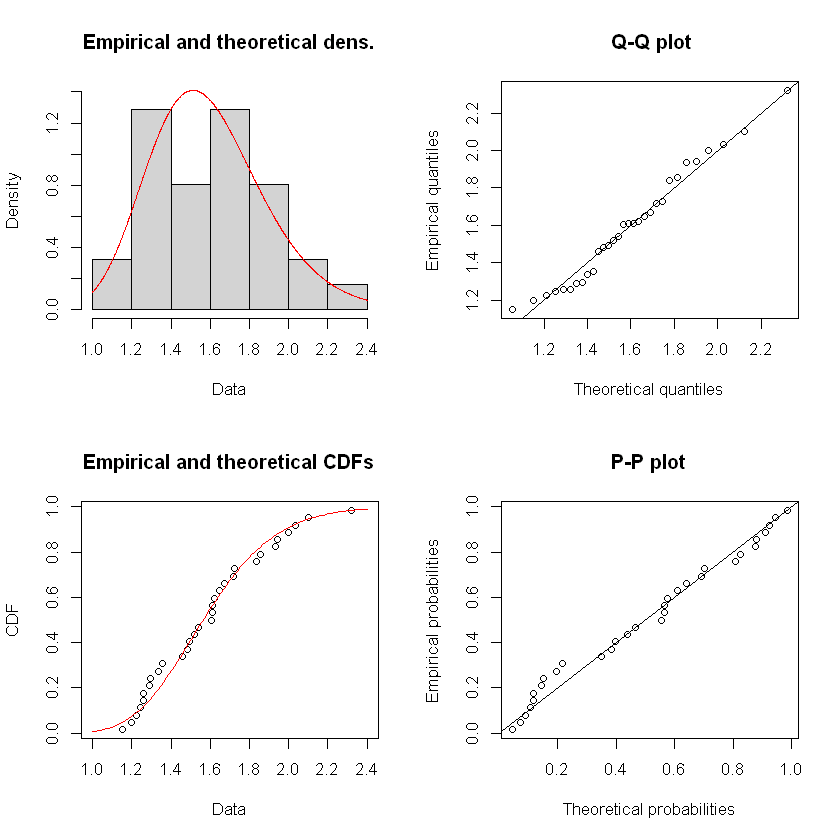

In [103]:
pval_table_DAV_d <- data.frame(Variable = character(), ChiSq_pvalue = numeric(), CvM = numeric(), AD = numeric(), stringsAsFactors = FALSE)

# Loop over variables and fit distributions
for (var in variables_DAV) {
  concvec <- daily_avg_data %>%
    filter(variable == var) %>%
    pull(daily_avg)
  
  # Fit log-normal distribution
  fit <- fitdist(ReplaceNonpositive(concvec), "lnorm")
  
  # Output
  print(var)
  print(fit)
  gof <-gofstat(fit)
    print(gof)
    cat("p-value =", gofstat(fit)[["chisqpvalue"]], "\n\n")
    pval.h <- gofstat(fit)[["chisqpvalue"]]
    # Append to table
    pval_table_DAV_d <- rbind(pval_table_DAV_d, data.frame(Variable = var, ChiSq_pvalue = pval.h, CvM =gof[["cvm"]], AD = gof[["ad"]] ))
  
  # Plot
  plot(fit)
}

In [105]:
rownames(pval_table_DAV_d) <- NULL
pval_table_DAV_d


Variable,ChiSq_pvalue,CvM,AD
<chr>,<dbl>,<dbl>,<dbl>
O3,0.16604490,0.07259433,0.4458695
NO2,0.05588262,0.05010732,0.3448954
PM10,0.70826732,0.04119797,0.2716185
NOX,0.13387581,0.04898207,0.3564126


## BASEL

In [87]:
gof_table_BAS_h

,Variable,ChiSq_pvalue,KS,CvM,AD,AIC,BIC,logLik
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1-mle-lnorm,O3,2.578881e-03,0.04620530,0.45949898,3.1942465,6984.40080,6993.61949,-3490.20040
1-mle-lnorm1,NO2,2.162981e-04,0.06640648,0.75822770,4.7611868,3968.11825,3977.33695,-1982.05912
1-mle-lnorm2,PM10,8.596570e-02,0.02555342,0.08857786,0.6823272,4326.47052,4335.69460,-2161.23526
1-mle-lnorm3,NOX,4.117863e-06,0.07231119,0.80616033,4.9371920,4184.34913,4193.56783,-2090.17457
1-mle-lnorm4,EC,1.244472e-86,0.25353077,6.51577481,42.7344031,-1144.85742,-1135.63334,574.42871
1-mle-lnorm5,CPC,2.095933e-03,0.05262926,0.44810222,2.5535070,14277.81224,14287.03632,-7136.90612
1-mle-lnorm6,SO2,2.483587e-70,0.23194441,5.29067945,36.1589808,60.27554,69.49423,-28.13777
1-mle-lnorm7,PM2.5,3.760785e-04,0.05132633,0.27994998,1.6903032,3388.98432,3398.20841,-1692.49216


In [95]:
variables_BAS <- c('O3','NO2','PM10','NOX','EC','CPC', 'SO2','PM2.5')
pval_table_BAS_h <- data.frame(Variable = character(), ChiSq_pvalue = numeric(), CvM = numeric(), AD = numeric(), stringsAsFactors = FALSE)


for (var in variables_BAS) {
    concvec <- lf %>% 
      filter(site=="BAS" & month==7 & variable==var) %>%
      {c(na.omit(.[["value"]]))}
    fit <- fitdist(ReplaceNonpositive(concvec), "lnorm")

    print(var)
    print(fit)
    gof <-gofstat(fit)
    print(gof)
    cat("p-value =", gofstat(fit)[["chisqpvalue"]], "\n\n")
    pval.h <- gofstat(fit)[["chisqpvalue"]]
    # Append to table
    pval_table_BAS_h <- rbind(pval_table_BAS_h, data.frame(Variable = var, ChiSq_pvalue = pval.h, CvM =gof[["cvm"]], AD = gof[["ad"]] ))
    
    # Save plot
    png(filename = paste0("outputs/BAS_h_fit_plot_", var, ".png"))
    plot(fit)
    dev.off()
    }

[1] "O3"
Fitting of the distribution ' lnorm ' by maximum likelihood 
Parameters:
         estimate Std. Error
meanlog 4.0957842 0.01631577
sdlog   0.4444363 0.01153673
Goodness-of-fit statistics
                             1-mle-lnorm
Kolmogorov-Smirnov statistic   0.0462053
Cramer-von Mises statistic     0.4594990
Anderson-Darling statistic     3.1942465

Goodness-of-fit criteria
                               1-mle-lnorm
Akaike's Information Criterion    6984.401
Bayesian Information Criterion    6993.619
p-value = 0.002578881 

[1] "NO2"
Fitting of the distribution ' lnorm ' by maximum likelihood 
Parameters:
         estimate Std. Error
meanlog 1.6402568 0.02490638
sdlog   0.6784418 0.01761130
Goodness-of-fit statistics
                             1-mle-lnorm
Kolmogorov-Smirnov statistic  0.06640648
Cramer-von Mises statistic    0.75822770
Anderson-Darling statistic    4.76118683

Goodness-of-fit criteria
                               1-mle-lnorm
Akaike's Information Criterion 

In [97]:
rownames(pval_table_BAS_h) <- NULL
pval_table_BAS_h

Variable,ChiSq_pvalue,CvM,AD
<chr>,<dbl>,<dbl>,<dbl>
O3,2.578881e-03,0.45949898,3.1942465
NO2,2.162981e-04,0.75822770,4.7611868
PM10,8.596570e-02,0.08857786,0.6823272
NOX,4.117863e-06,0.80616033,4.9371920
EC,1.244472e-86,6.51577481,42.7344031
CPC,2.095933e-03,0.44810222,2.5535070
SO2,2.483587e-70,5.29067945,36.1589808
PM2.5,3.760785e-04,0.27994998,1.6903032


#### Daily averages 

In [37]:
variables_BAS <- c('O3','NO2','PM10','NOX','EC','CPC', 'SO2','PM2.5')
# Ensure datetime is in proper Date format
lf <- lf %>%
  mutate(date = as.Date(datetime))

# Precompute daily averages only for complete days
daily_avg_data_BAS <- lf %>%
  filter(site == "BAS", month == 7, variable %in% variables_BAS) %>%
  group_by(variable, date) %>%
  filter(n() == 24) %>%  # Keep only complete days
  summarise(daily_avg = mean(value, na.rm = TRUE), .groups = "drop")
daily_avg_data_BAS

variable,date,daily_avg
<chr>,<date>,<dbl>
CPC,2024-07-01,2834.012
CPC,2024-07-02,2691.258
CPC,2024-07-03,2408.792
CPC,2024-07-04,6294.242
CPC,2024-07-05,6966.233
CPC,2024-07-06,7247.892
CPC,2024-07-07,6020.608
CPC,2024-07-08,9825.058
CPC,2024-07-09,10171.129


In [108]:
pval_table_BAS_d <- data.frame(Variable = character(), ChiSq_pvalue = numeric(), CvM = numeric(), AD = numeric(), stringsAsFactors = FALSE)

# Loop over variables and fit distributions
for (var in variables_BAS) {
  concvec <- daily_avg_data_BAS %>%
    filter(variable == var) %>%
    pull(daily_avg)
  
  # Fit log-normal distribution
  fit <- fitdist(ReplaceNonpositive(concvec), "lnorm")
  
  # Output
  print(var)
  print(fit)
  gof <-gofstat(fit)
  print(gof)
  cat("p-value =", gofstat(fit)[["chisqpvalue"]], "\n\n")

  pval.h <- gofstat(fit)[["chisqpvalue"]]
  # Append to table
  pval_table_BAS_d <- rbind(pval_table_BAS_d, data.frame(Variable = var, ChiSq_pvalue = pval.h, CvM =gof[["cvm"]], AD = gof[["ad"]] ))
  
  png(filename = paste0("outputs/BAS_d_fit_plot_", var, ".png"))
    plot(fit)
    dev.off()
}

[1] "O3"
Fitting of the distribution ' lnorm ' by maximum likelihood 
Parameters:
         estimate Std. Error
meanlog 4.1671279 0.03451319
sdlog   0.1921613 0.02440154
Goodness-of-fit statistics
                             1-mle-lnorm
Kolmogorov-Smirnov statistic  0.09846610
Cramer-von Mises statistic    0.03159993
Anderson-Darling statistic    0.24005684

Goodness-of-fit criteria
                               1-mle-lnorm
Akaike's Information Criterion    248.0721
Bayesian Information Criterion    250.9401
p-value = 0.8074032 

[1] "NO2"
Fitting of the distribution ' lnorm ' by maximum likelihood 
Parameters:
         estimate Std. Error
meanlog 1.7904034 0.07701218
sdlog   0.4287856 0.05445450
Goodness-of-fit statistics
                             1-mle-lnorm
Kolmogorov-Smirnov statistic   0.1753798
Cramer-von Mises statistic     0.1391151
Anderson-Darling statistic     0.7906619

Goodness-of-fit criteria
                               1-mle-lnorm
Akaike's Information Criterion   

In [102]:
rownames(pval_table_BAS_d) <- NULL
pval_table_BAS_d

Variable,ChiSq_pvalue,CvM,AD
<chr>,<dbl>,<dbl>,<dbl>
O3,0.807403240,0.03159993,0.2400568
NO2,0.016553004,0.13911515,0.7906619
PM10,0.853721274,0.03529876,0.2279352
NOX,0.030422203,0.15014834,0.8176123
EC,0.085597682,0.11298183,0.6688669
CPC,0.005013813,0.16260821,1.0856123
SO2,0.394367631,0.10628871,0.7066278
PM2.5,0.011952780,0.10910860,0.6592833
